# Project2: Investigate a Dataset (TMDb movie data)
##### Udacity Data Analyst Nanodegree Program.
##### Hajer Aloulah, 2020




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Summary">Summary</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this porject I am investigating a TMDb movie database file which has collection of information about 10,000 movies which collected from The Movie Database (TMDb), including user votes, revenue, genres, runtime and budget. So, during this project, i'll be answering the following questions:
>1. What is the average runtime of all movies?
>2. Which movie had the greatest and least budget?
>3. In which year we had the most movie making profits on average by year?



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


In [45]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [46]:
df.shape

(10866, 21)

In [47]:
df.duplicated().sum()

1

In [48]:
list(df.isnull().sum().items())

[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7930),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

In [49]:
df.drop_duplicates(inplace = True)

In [50]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [135]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

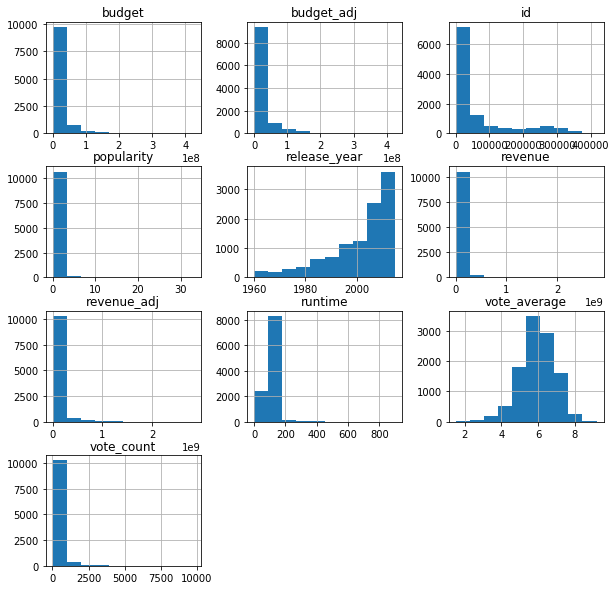

In [136]:
df.hist(figsize = (10, 10));

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          



### Data Cleaning

In [138]:
tmdb_movies = pd.read_csv('tmdb-movies.csv')
#to store the DB of tmdb movies into a df

In [139]:
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

In [140]:
#drop columns which are not use
tmdb_movies = tmdb_movies.drop(del_col, 1)

In [141]:
tmdb_movies.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [142]:
#Cleaning Duplicates
tmdb_movies.drop_duplicates(keep = 'first', inplace = True)

In [143]:
rows, col = tmdb_movies.shape
#to drop duplicate rows

In [144]:
check_row = ['budget', 'revenue']

In [145]:
df_budget_zero = df.query('budget == 0')
df_budget_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00


In [146]:
df_revenue_zero = df.query('revenue == 0')
df_revenue_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0


In [147]:
tmdb_movies[check_row] = tmdb_movies[check_row].replace(0, np.NaN)

In [148]:
tmdb_movies.dropna(subset = check_row, inplace = True)

In [149]:
rows, col = tmdb_movies.shape

In [150]:
tmdb_movies.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [154]:
#Changing Datatypes
change_coltype = ['budget', 'revenue']
tmdb_movies[change_coltype] = tmdb_movies[change_coltype].applymap(np.int64)
tmdb_movies.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis




### Question 1 (What is the average runtime of all movies?)


In [181]:
def average_func(column_name):
    
    return tmdb_movies[column_name].mean()

In [185]:
average_func('runtime')

109.22029060716139

> So, 109 mins approx it's the average runtime of all movies.

### Question 2  (What the movie had the highest and lowest budget?)

In [196]:
def highest_lowest(column_name):
    
    #highest
    highest_id = tmdb_movies[column_name].idxmax()
    highest_details = pd.DataFrame(tmdb_movies.loc[highest_id])
    
        
    #least
    lowest_id = tmdb_movies[column_name].idxmin()
    lowest_details = pd.DataFrame(tmdb_movies.loc[lowest_id])
        
        
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    return two_in_one_data
highest_lowest('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,12/2/10,4/23/99
release_year,2010,1999


> So, the "Warrior's Way" had the highest budget of all movies in the dataset about 425000000 dollars and its had the highest loss and chance of making revenues about 11087569 dollars.
Then, the "Lost & Found" movie had lowest budget of 1 dollar and it's had revenue of 100 dollars.

### Question 3  (What is name of the directer which directed most films?)

In [197]:
    director_count = extract_data('director')
director_count.head()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Robert Rodriguez    17
dtype: int64

> As you see, (Steven Spielberg) had directing 28 movies based on this DB. then other directors, Clint Eastwood, Ridley Scott, Woody Allen etc.

<a id='Summary'></a>
## Project Summary

>- Remove duplicated data.
>- Remove all null values in the columns that have null values.
>- Remove some columns that unnecessary data.
>- Replace zero values with null values in the budget and revenue column.
>- Change Datatypes for budget and revenue.

<a id='conclusions'></a>
## Conclusions

>In this project, I analyzed the given TMDb dataset including over 10,000 movies and their properties like  user ratings, genres, budget, revenue, director, and runtime. And it has been cleaned, change datatype and remove duplicate columns.
Then, I answered for all qustions which I assume them and I found this useful conclusions:
The average runtime of all movies is 109 mins approx. And if would you see about which movie had highest and lowest budget, the "Warrior's Way" had the highest budget of all movies in the dataset about 425M dollars and its had the highest loss and chance of making revenues about 11087569 dollars. Then, the "Lost & Found" movie had lowest budget of 1 dollar and it's had revenue of 100 dollars.
Finally, The Steven Spielberg had directing 28 movies. then other directors, Clint Eastwood, Ridley Scott, Woody Allen etc.
So, After data analysis of TMDb we can found data of movies easier and faster.